In [ ]:
%pip install langgraph langchain-core langchain


Note: you may need to restart the kernel to use updated packages.


In [1]:
from typing import Annotated , TypedDict
from langgraph.graph import StateGraph , START  , END
from langgraph.graph.message import add_messages


In [2]:

class State(TypedDict):
    messages : Annotated[list[str] , add_messages()]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")


In [9]:
from langchain_tavily import TavilySearch
tool = TavilySearch()
tools = [tool]

llm_with_tools = llm.bind_tools(tools)

In [10]:
graph_builder = StateGraph(State)

from langgraph.prebuilt import ToolNode , tools_condition
def tool_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}
graph_builder.add_node("llm_tool" , tool_llm )
graph_builder.add_node("tools" , ToolNode(tools) )
graph_builder.add_edge(START , "llm_tool")
graph_builder.add_conditional_edges("llm_tool" ,tools_condition)
graph_builder.add_edge("tools" , END)
graph = graph_builder.compile()

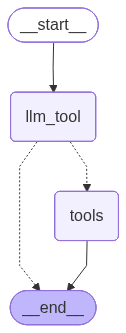

None
Graph compiled successfully.


In [11]:
from IPython.display import Image, display
print(display(Image(graph.get_graph().draw_mermaid_png())))
print("Graph compiled successfully.")

In [12]:

from langchain_core.messages import HumanMessage

{"messages": [HumanMessage(content="What is the recent AI news?")]}
response=graph.invoke({"messages":"What is the recent ai news"})
print(response['messages'][-1].content)

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://thenextweb.com/news/generative-ai-is-the-future", "title": "AI is old news. Generative AI is the future. - The Next Web", "score": 0.99029154, "published_date": "Sat, 10 Jan 2026 11:12:17 GMT", "content": "That sentence should be a constant reminder for everyone: life is an ongoing evolution. Technologies disrupt, jobs disappear, and new ones emerge. So the next time you hear someone say, “We need to get into AI,” ask, “Which AI?”\n\nTraditional AI analyzes what already exists, and chances are, you and your company are already using it. Generative AI creates what’s next. This distinction matters. If you treat Generative AI like a search engine or a calculator, you miss its true potential. If you treat it as an absolute source of truth, you risk misuse. [...] Companies have relied on AI rule-based automation, routines, and machine-learning algorithms for years to power the